# k-means

In this tutorial, we're going to be building our own **k-means** algorithm from scratch. 

Recall the methodology for the k-means algorithm:

1. Choose value for # of clusters K
2. Randomly select K to start as your centroids
3. Calculate distance of all other values to centroids
4. Classify other values to closest centroid
5. Take mean of each class (mean of all value by class), making that mean the new centroid
6. Repeat steps 3-5 until optimized (centroids no longer moving)

To begin, we will start with some random data.

Exercises and code samples for the course **Unsupervised and Reinforcement Learning (AAI-URL)** in the Bachelor of AAI at Rosenheim University of Applied Sciences.

## Simple Approach


Here is 

In [6]:
import random as rnd

''' 
a distance function 
'''
def euclidean_distance(X,Y):
    l = list(zip(X,Y))
    r = sum([abs(x-y)**2 for x,y in l])
    return r

''' 
Randomly select K to start as your centroids 
'''
def pick_centroids(X):
    c1 = X[rnd.randint(0,len(X)-1)]
    c2 = X[rnd.randint(0,len(X))-1]       
    return c1,c2

''' 
Calculate distance of all other values to centroids and Classify other values to closest centroid 
'''
def clustering(C1, C2, X):
    cluster1=[]
    cluster2=[]
    for i in X:
            if euclidean_distance(C1,i) < euclidean_distance(C2,i):
                cluster1.append(i)
            else:
                cluster2.append(i)
    return cluster1, cluster2

''' Take mean of each class (mean of all value by class), making that mean the new centroid '''
def recenter(X):
    r = [0,0]
    for j in X:
        r[0] += j[0]
        r[1] += j[1]
    r[0]=r[0]/len(X)
    r[1]=r[1]/len(X)
    return r


X=[[0,0], [0,1], [-1,2], [2,0], [3,0], [4,-1], [5,2], [0,-1], [6,3]]

C1, C2 = pick_centroids(X)
print(f'Starting centroids C1, C2; {C1, C2}')


while True:
    cl1,cl2 = clustering(C1,C2,X)
    old_C1 = C1
    old_C2 = C2
    C1 = recenter(cl1)
    C2 = recenter(cl2)
    if euclidean_distance(old_C1, C1)==0:
        break

print(f'Final centroids C1, C2; {C1, C2}')

print(f'Cluster 1: {cl1}')
print(f'Cluster 2: {cl2}')

Starting centroids C1, C2; ([6, 3], [0, 1])
Final centroids C1, C2; ([5.5, 2.5], [1.1428571428571428, 0.14285714285714285])
Cluster 1: [[5, 2], [6, 3]]
Cluster 2: [[0, 0], [0, 1], [-1, 2], [2, 0], [3, 0], [4, -1], [0, -1]]


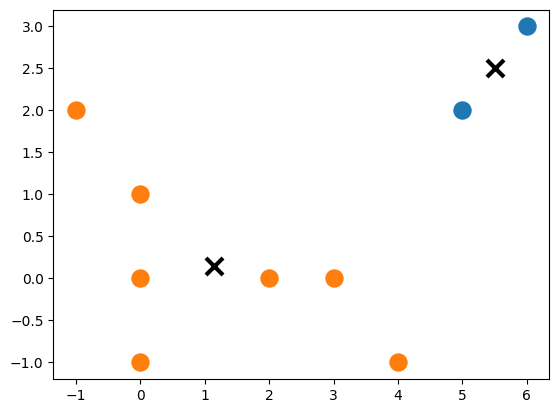

In [12]:
import matplotlib.pyplot as plt
import numpy as np

CL1 = np.asarray(cl1)
CL2 = np.asarray(cl2)

plt.scatter(CL1[:,0], CL1[:,1], s=150)
plt.scatter(CL2[:,0], CL2[:,1], s=150)

plt.scatter(C1[0], C1[1], marker="x", color="k", s=150, linewidths=3)
plt.scatter(C2[0], C2[1], marker="x", color="k", s=150, linewidths=3)

plt.show()

## More Professional

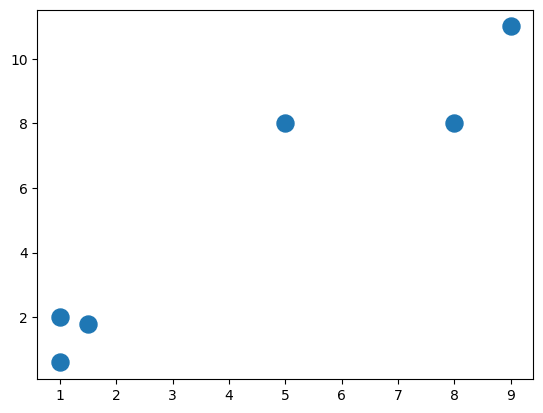

In [1]:
import matplotlib.pyplot as plt
import numpy as np


X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

It should be obvious where our clusters are.

We're going to be choosing **k=2**. :-)



### K-Means class

We just set up some starting values here:

- _k_   : # of clusters
- _tol_ : is the tolerance, which will allow us to say we're optimized if the centroid is not moving more than the tolerance value
- _n_   : value is to limit the number of cycles we're willing to run

```python
    class K_Means:
        def __init__(self, k=2, tol=0.001, n=300):
            self.k   = k
            self.tol = tol
            self.n   = n
```
`
To begin, we know we just need to pass whatever data we're fitting to. We then begin an empty dictionary for our centroids.
Next, we begin a for loop which simply assigns our starting centroids as the first two data samples in our data. If you wanted to truly select randomly the starting centroids, you could first shuffle the data, but this should be fine.

```python
    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]


```

We start with empty classifications, and then create two dict keys (by iterating through range of self.k).

Next, we need to iterate through our values, calculate distances of the values to the current centroids, and classify them as such:

```python
        for i in range(self.n):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
                
            for value in data:
                distances = [np.linalg.norm(value-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(value)
```

Next, we're going to need to create the new centroids, as well as measuring the movement of the centroids. If that movement is less than our tolerance (self.tol), then we're all set. Including that addition, full code up to this point:

```python
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)   
```

Now that we have new centroids, and knowledge of the previous centroids, we're curious if we're optimized yet. Easy enough, we will add the following to the end of the fit method:


```python
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
```

We start off assuming we are optimized. We then take all of the centroids, and compare them to the previous centroids. If they are within our required tolerance, then we're happy. If not, then we set optimized to False and we continue in our for for i in range(self.max_iter): loop. If we are optimized?

        
The entire k-means class looks like this:

In [2]:

class K_Means:
    def __init__(self, k=2, tol=0.001, n=300):
        self.k   = k
        self.tol = tol
        self.n   = n

    def euclidean_distance(self, X,Y):
        return (np.sum((X-Y)**2))**0.5

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.n):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for value in data:
                # use euclidean_distance or np.linalg.norm
                distances = [self.euclidean_distance(value, self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(value)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break
                
    def plot(self):
        colors = 10*["g","r","c","b","k"]

        #plot centroids
        for centroid in self.centroids:
            plt.scatter(self.centroids[centroid][0], self.centroids[centroid][1], marker="o", color="k", s=150, linewidths=3)

        # plot smaples
        for classification in self.classifications:
            color = colors[classification]
            for value in self.classifications[classification]:
                plt.scatter(value[0], value[1], marker="x", color=color, s=150, linewidths=3)
        
        plt.show()

Now we can do something like:

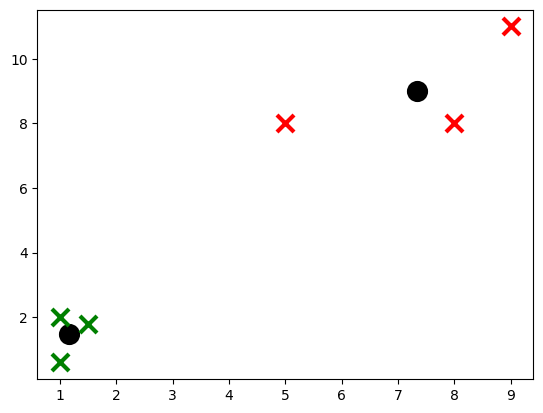

In [3]:

clf = K_Means()
clf.fit(X)

clf.plot()

What if we took our predictions and added them to the original dataset? That would move the centroids, and would it possibly mean new classifications for any of the data?

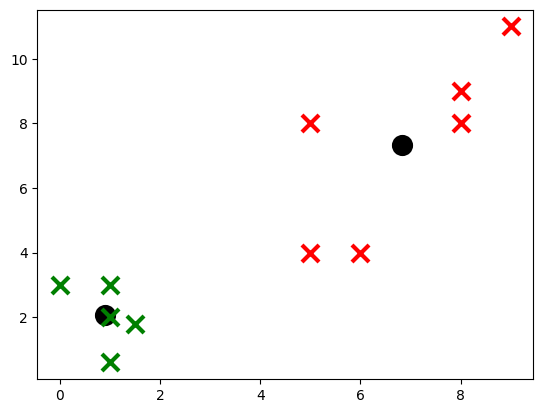

In [4]:

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4],])

clf = K_Means()
clf.fit(X)

clf.plot()